![Hand with calculator](calculator.jpg)

Did you know that the average return from investing in stocks is [10% per year](https://www.nerdwallet.com/article/investing/average-stock-market-return) (not accounting for inflation)? But who wants to be average?! 

You have been asked to support an investment firm by analyzing trends in high-growth companies. They are interested in understanding which industries are producing the highest valuations and the rate at which new high-value companies are emerging. Providing them with this information gives them a competitive insight as to industry trends and how they should structure their portfolio looking forward.

You have been given access to their `unicorns` database, which contains the following tables:

## dates
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `date_joined` | The date that the company became a unicorn.  |
| `year_founded` | The year that the company was founded.       |

## funding
| Column           | Description                                  |
|----------------- |--------------------------------------------- |
| `company_id`       | A unique ID for the company.                 |
| `valuation`        | Company value in US dollars.                 |
| `funding`          | The amount of funding raised in US dollars.  |
| `select_investors` | A list of key investors in the company.      |

## industries
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `industry`     | The industry that the company operates in.   |

## companies
| Column       | Description                                       |
|------------- |-------------------------------------------------- |
| `company_id`   | A unique ID for the company.                      |
| `company`      | The name of the company.                          |
| `city`         | The city where the company is headquartered.      |
| `country`      | The country where the company is headquartered.   |
| `continent`    | The continent where the company is headquartered. |


# The output

Your query should return a table in the following format:
| industry  | year | num\_unicorns       | average\_valuation\_billions |
| --------- | ---- | ------------------- | ---------------------------- |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |

Where `industry1`, `industry2`, and `industry3` are the three top-performing industries.

In [11]:
WITH unicorn_counts AS (
    SELECT 
        i.industry, 
        EXTRACT(YEAR FROM d.date_joined) AS year, 
        COUNT(*) AS num_unicorns
    FROM 
        industries i
    JOIN dates d ON i.company_id = d.company_id
    WHERE EXTRACT(YEAR FROM d.date_joined) IN (2019, 2020, 2021) 
    GROUP BY i.industry, EXTRACT(YEAR FROM d.date_joined) 
),

top_industries AS (
    SELECT 
        industry,
        SUM(num_unicorns) AS total_unicorns
    FROM unicorn_counts
    GROUP BY industry
    ORDER BY total_unicorns DESC
    LIMIT 3
)

SELECT 
    i.industry,
    EXTRACT(YEAR FROM d.date_joined) AS year,
    COUNT(*) AS num_unicorns,
    ROUND(AVG(f.valuation) / 1e9, 2) AS average_valuation_billions
FROM 
    industries i
JOIN dates d ON i.company_id = d.company_id
JOIN funding f ON i.company_id = f.company_id
WHERE 
    i.industry IN (SELECT industry FROM top_industries)
    AND EXTRACT(YEAR FROM d.date_joined) IN (2019, 2020, 2021)
GROUP BY 
    i.industry, EXTRACT(YEAR FROM d.date_joined)
ORDER BY 
    EXTRACT(YEAR FROM d.date_joined) DESC,
    num_unicorns DESC;

,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,2.75
1,Internet software & services,2021,119,2.15
2,E-commerce & direct-to-consumer,2021,47,2.47
3,Internet software & services,2020,20,4.35
4,E-commerce & direct-to-consumer,2020,16,4.00
5,Fintech,2020,15,4.33
6,Fintech,2019,20,6.80
7,Internet software & services,2019,13,4.23
8,E-commerce & direct-to-consumer,2019,12,2.58


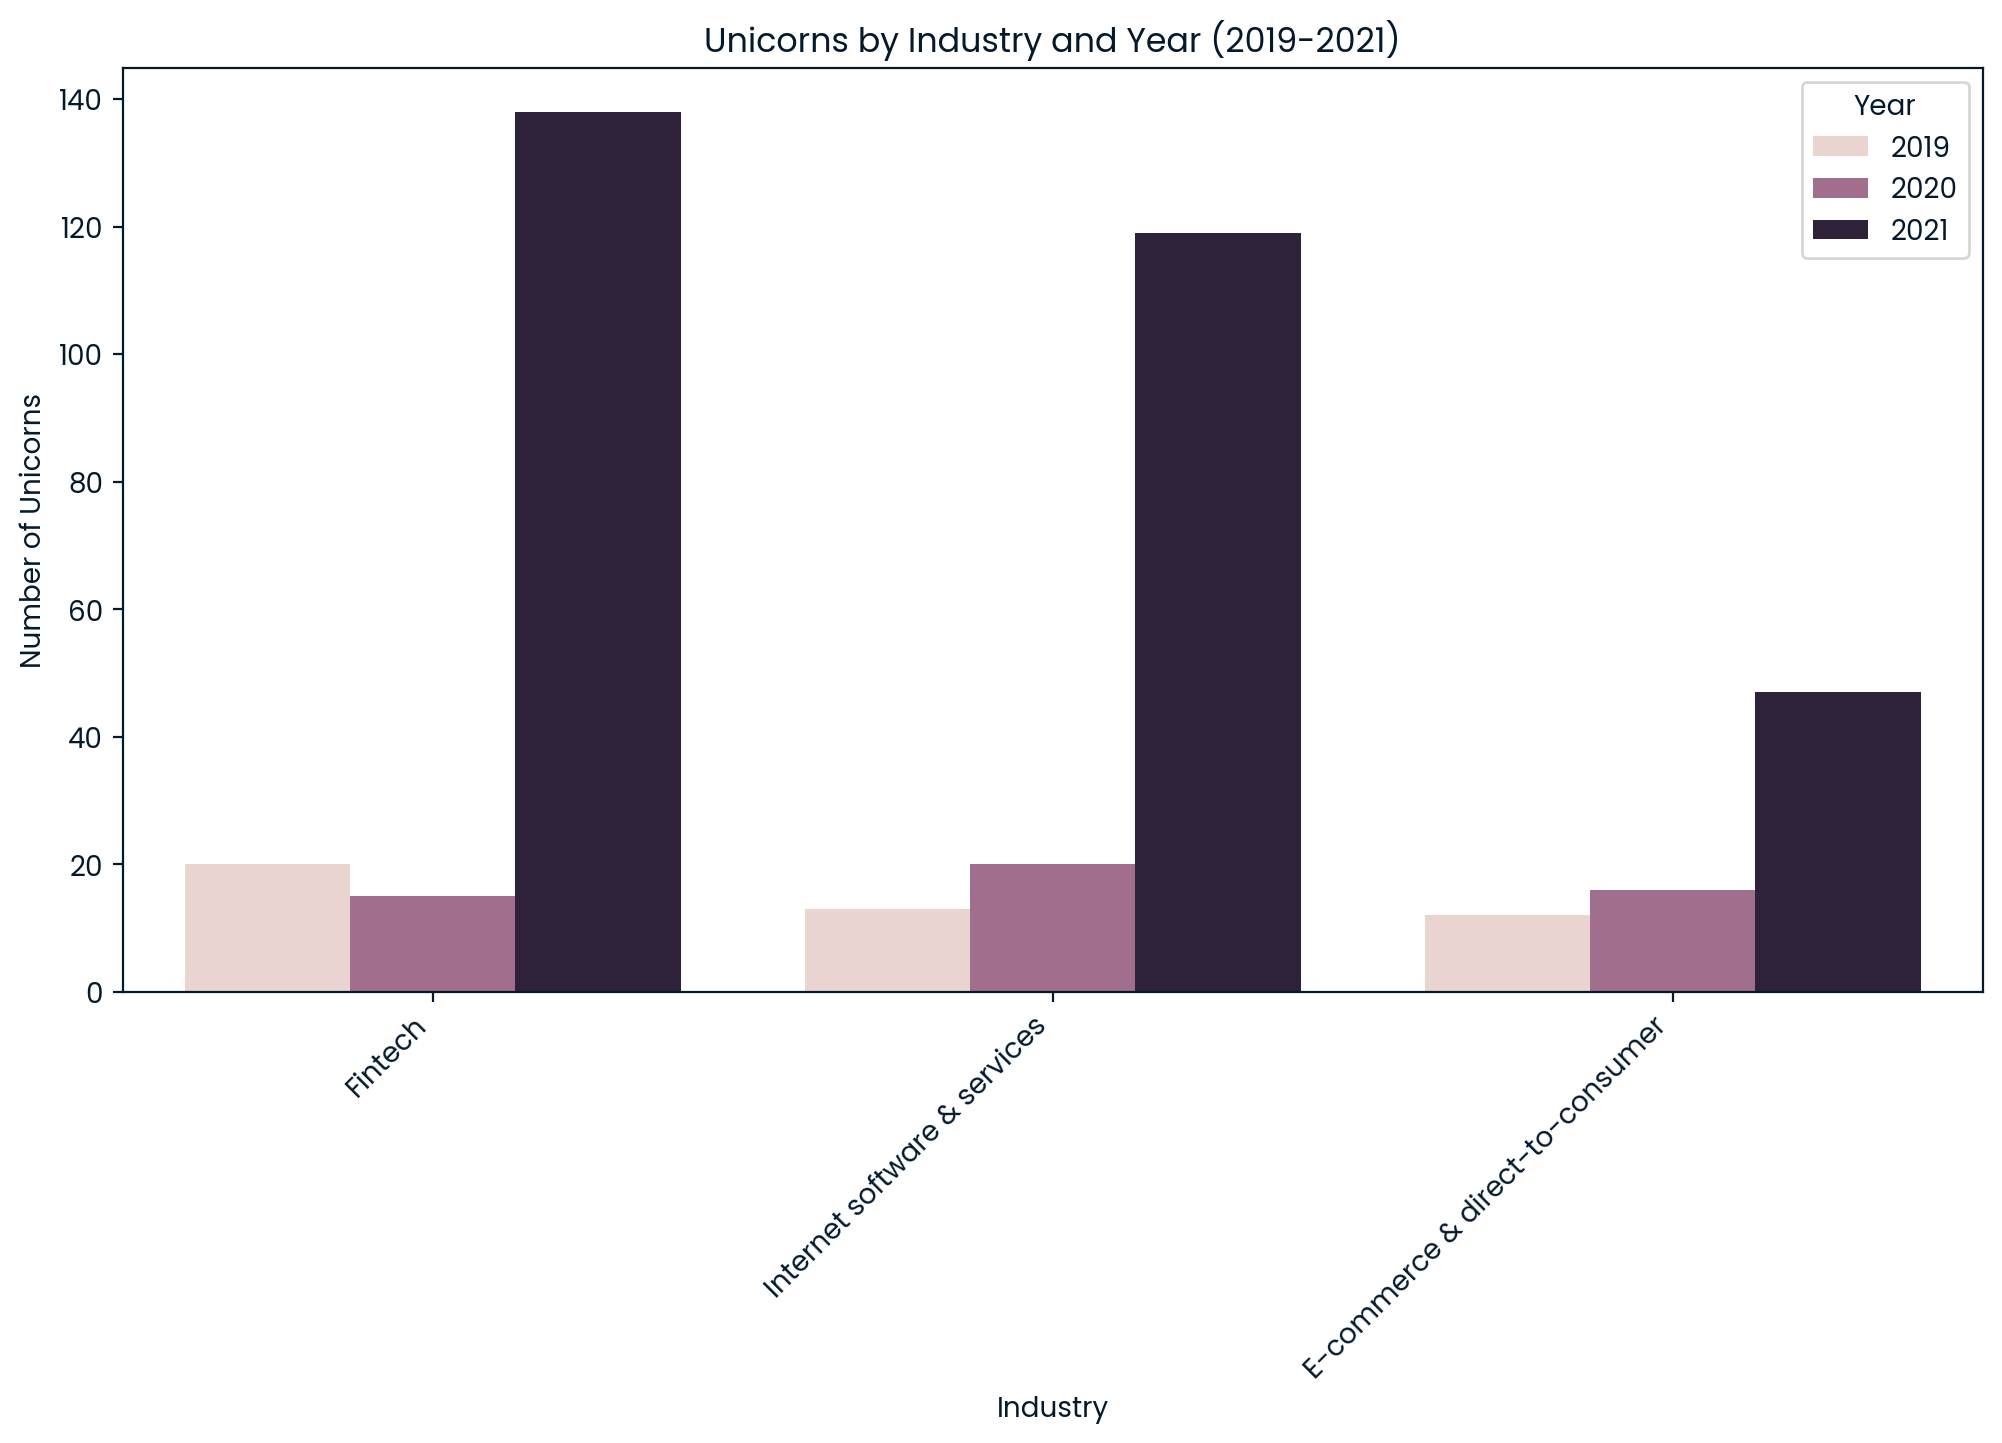

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='industry', y='num_unicorns', hue='year', ci=None)

# Customize the chart
plt.title('Unicorns by Industry and Year (2019-2021)')
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.legend(title='Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Save the chart
plt.savefig('unicorns_by_industry_and_year.png')  # Save the figure as PNG
plt.show()


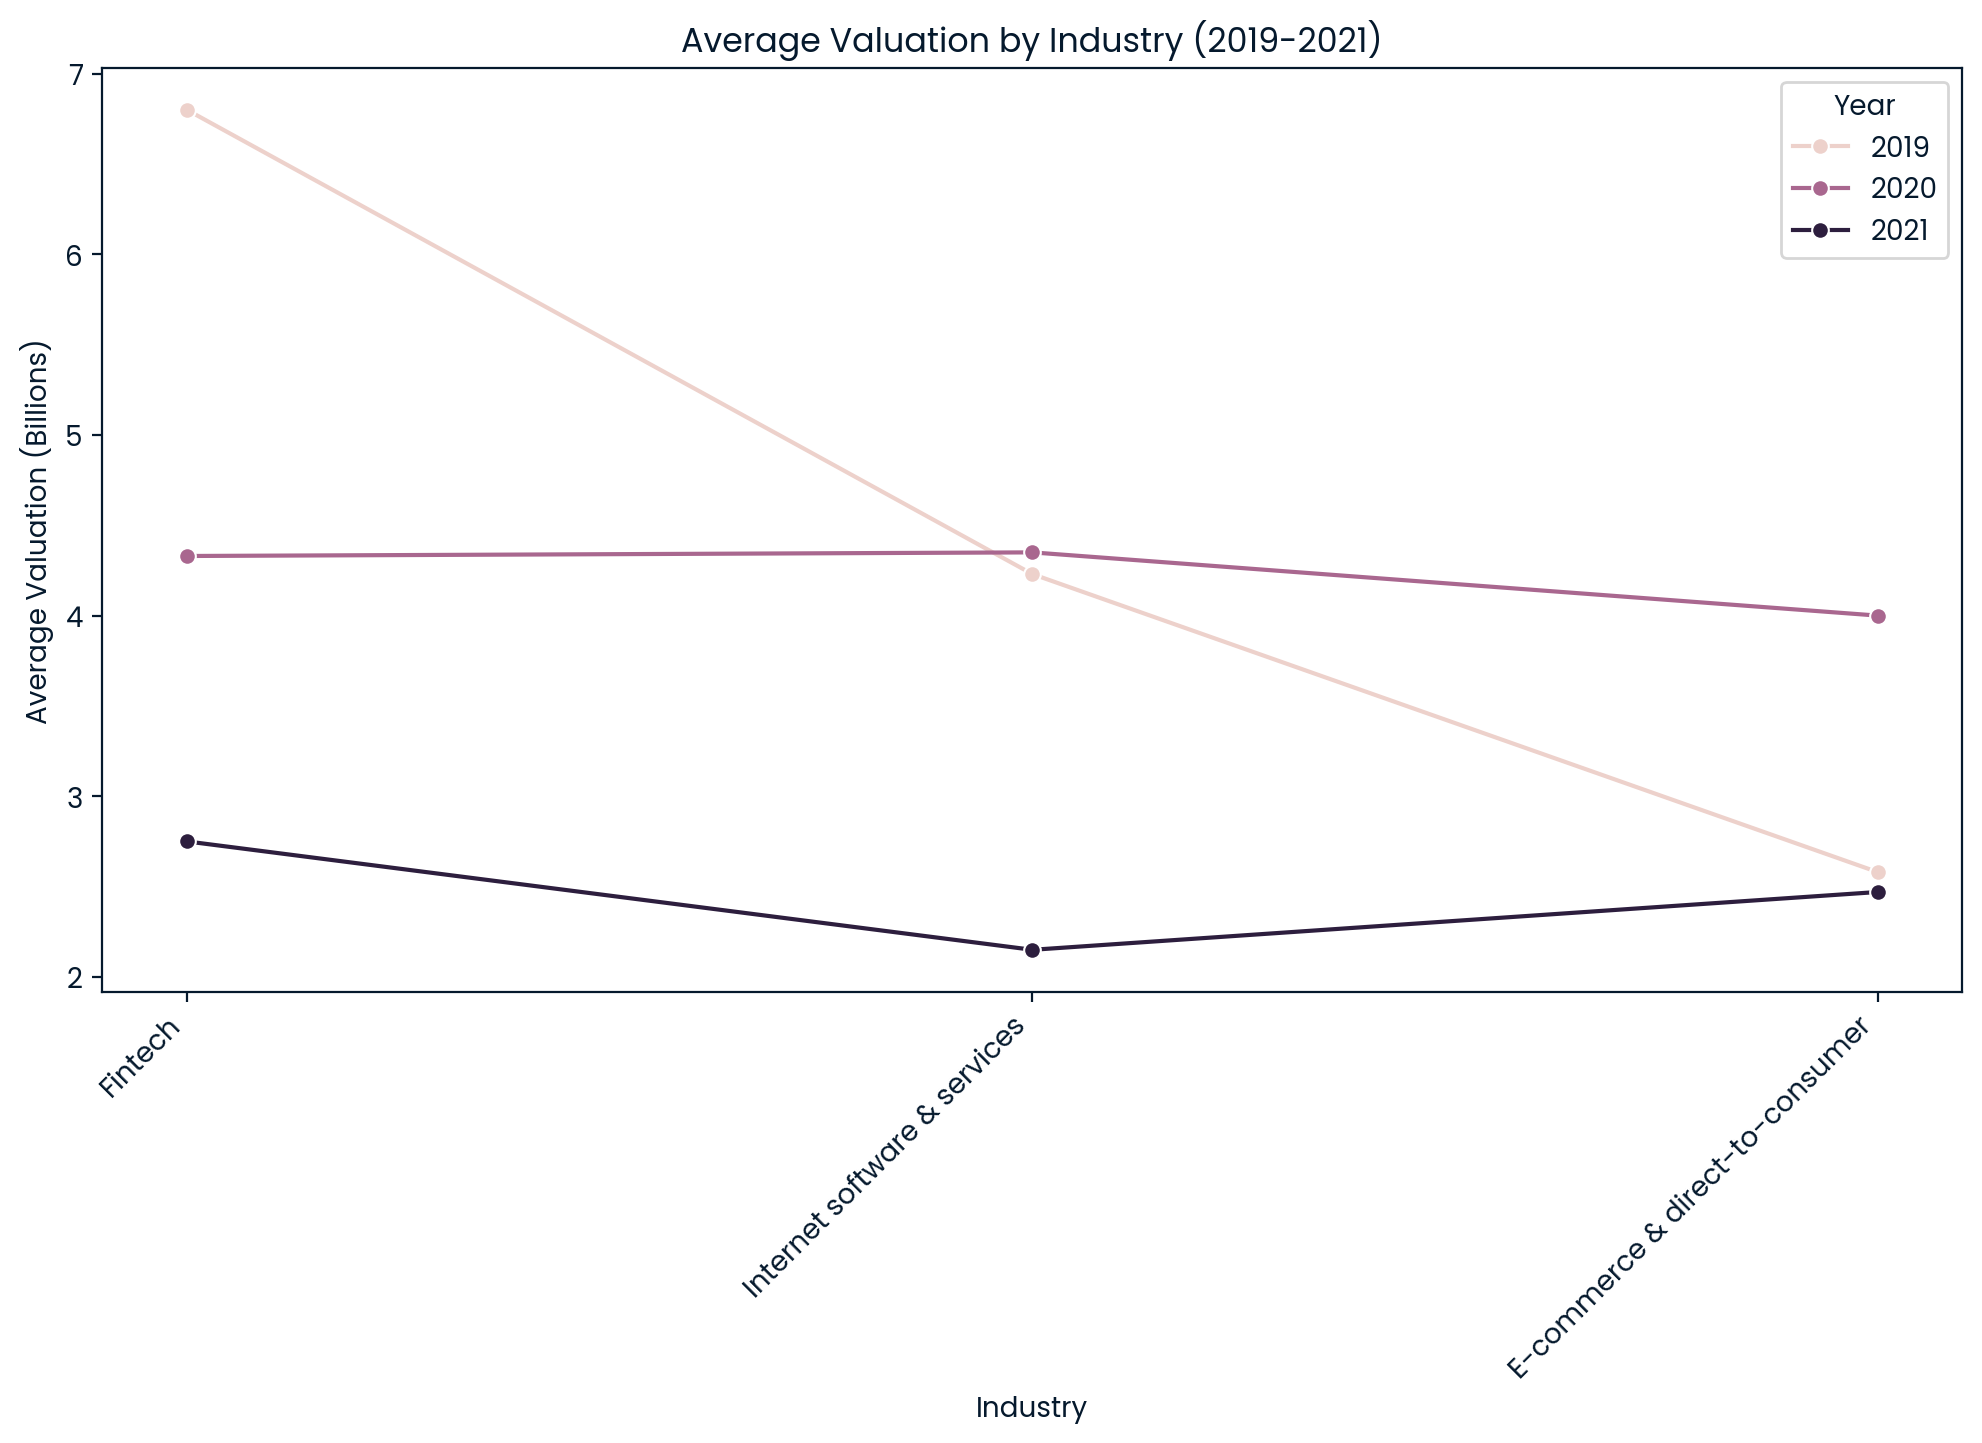

In [16]:
# Plotting the line chart for average valuation by industry
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='industry', y='average_valuation_billions', hue='year', marker='o')

# Customize the chart
plt.title('Average Valuation by Industry (2019-2021)')
plt.xlabel('Industry')
plt.ylabel('Average Valuation (Billions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Year')

# Save the chart
plt.savefig('average_valuation_by_industry.png')  # Save the figure as PNG
plt.show()


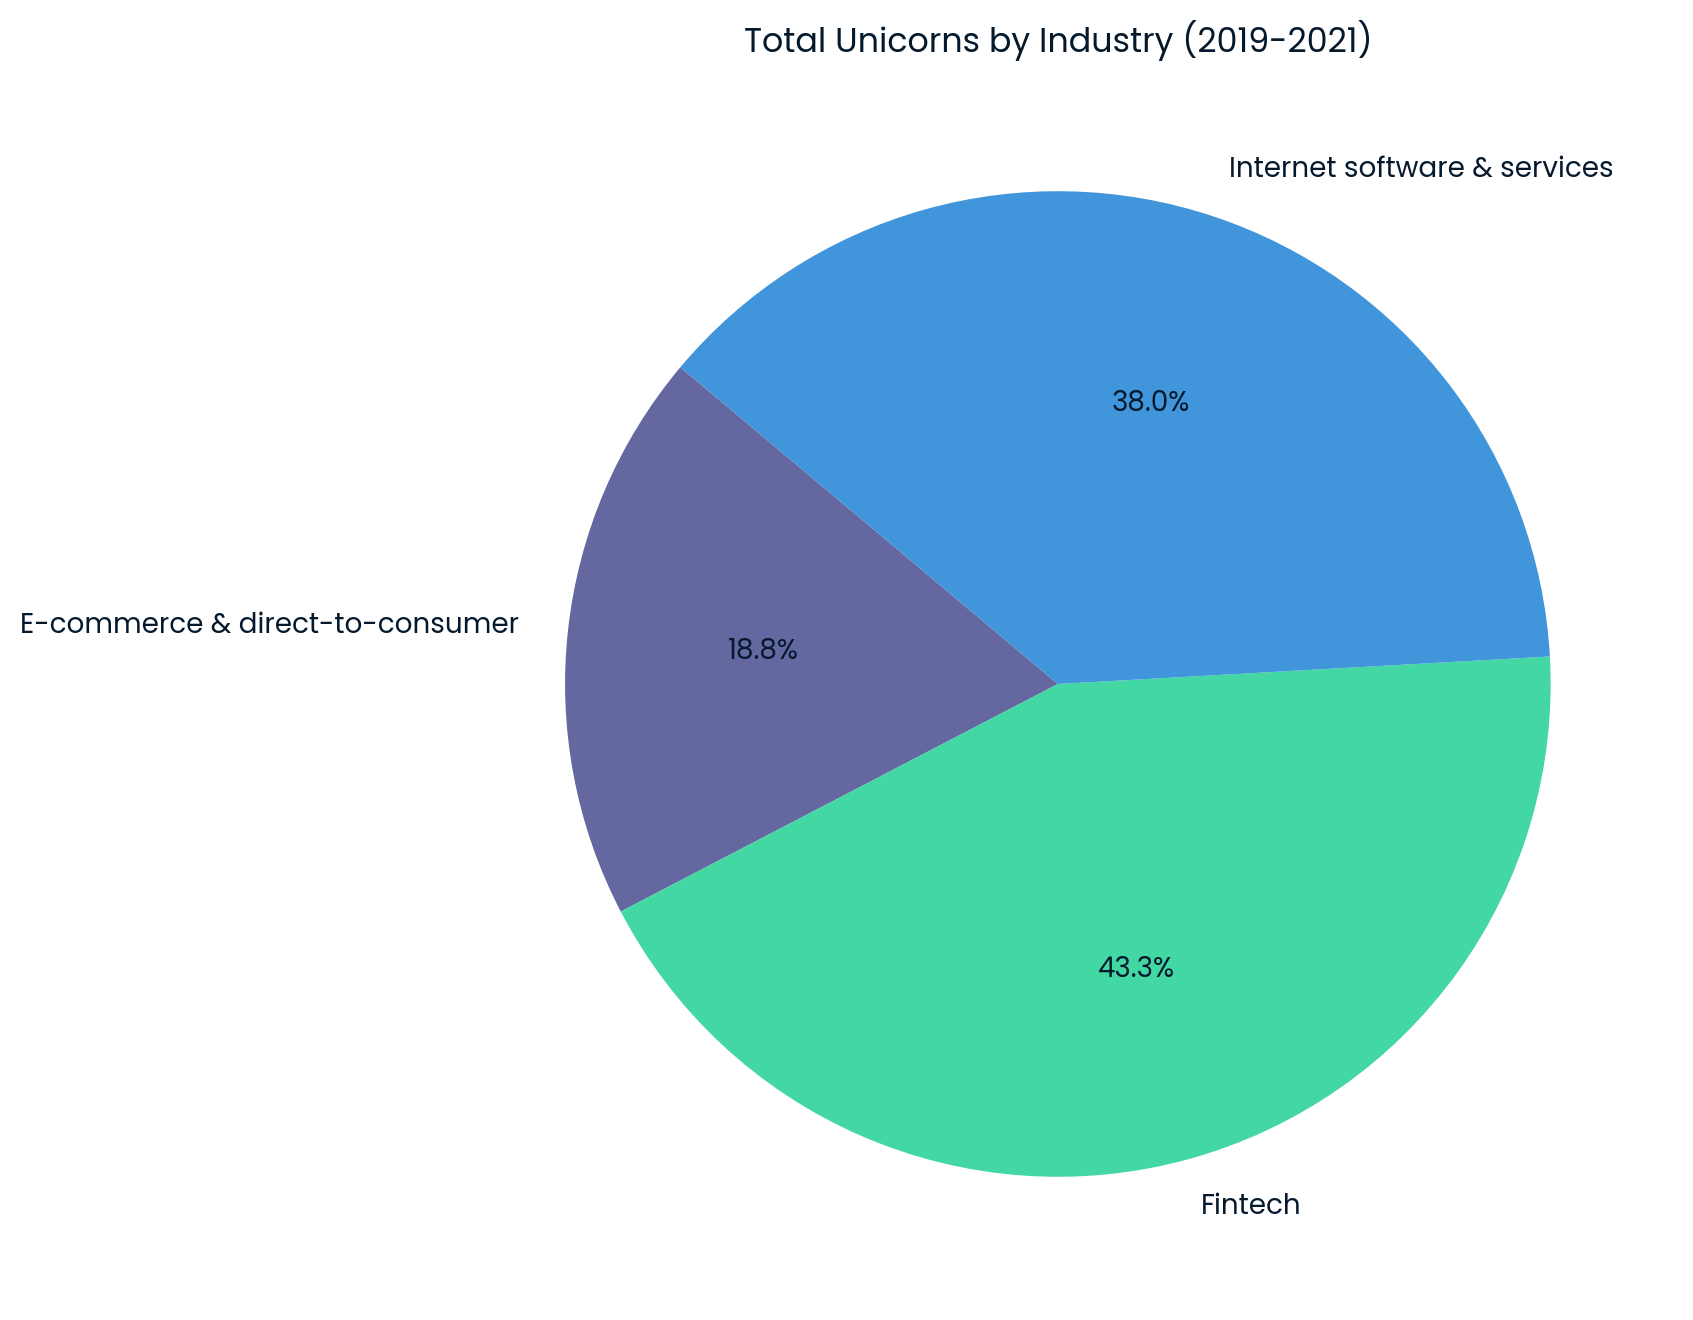

In [17]:
# Aggregating the total unicorns by industry
total_unicorns_by_industry = df.groupby('industry')['num_unicorns'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_unicorns_by_industry, labels=total_unicorns_by_industry.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Unicorns by Industry (2019-2021)')

# Save the chart
plt.savefig('total_unicorns_by_industry.png')  # Save the figure as PNG
plt.show()


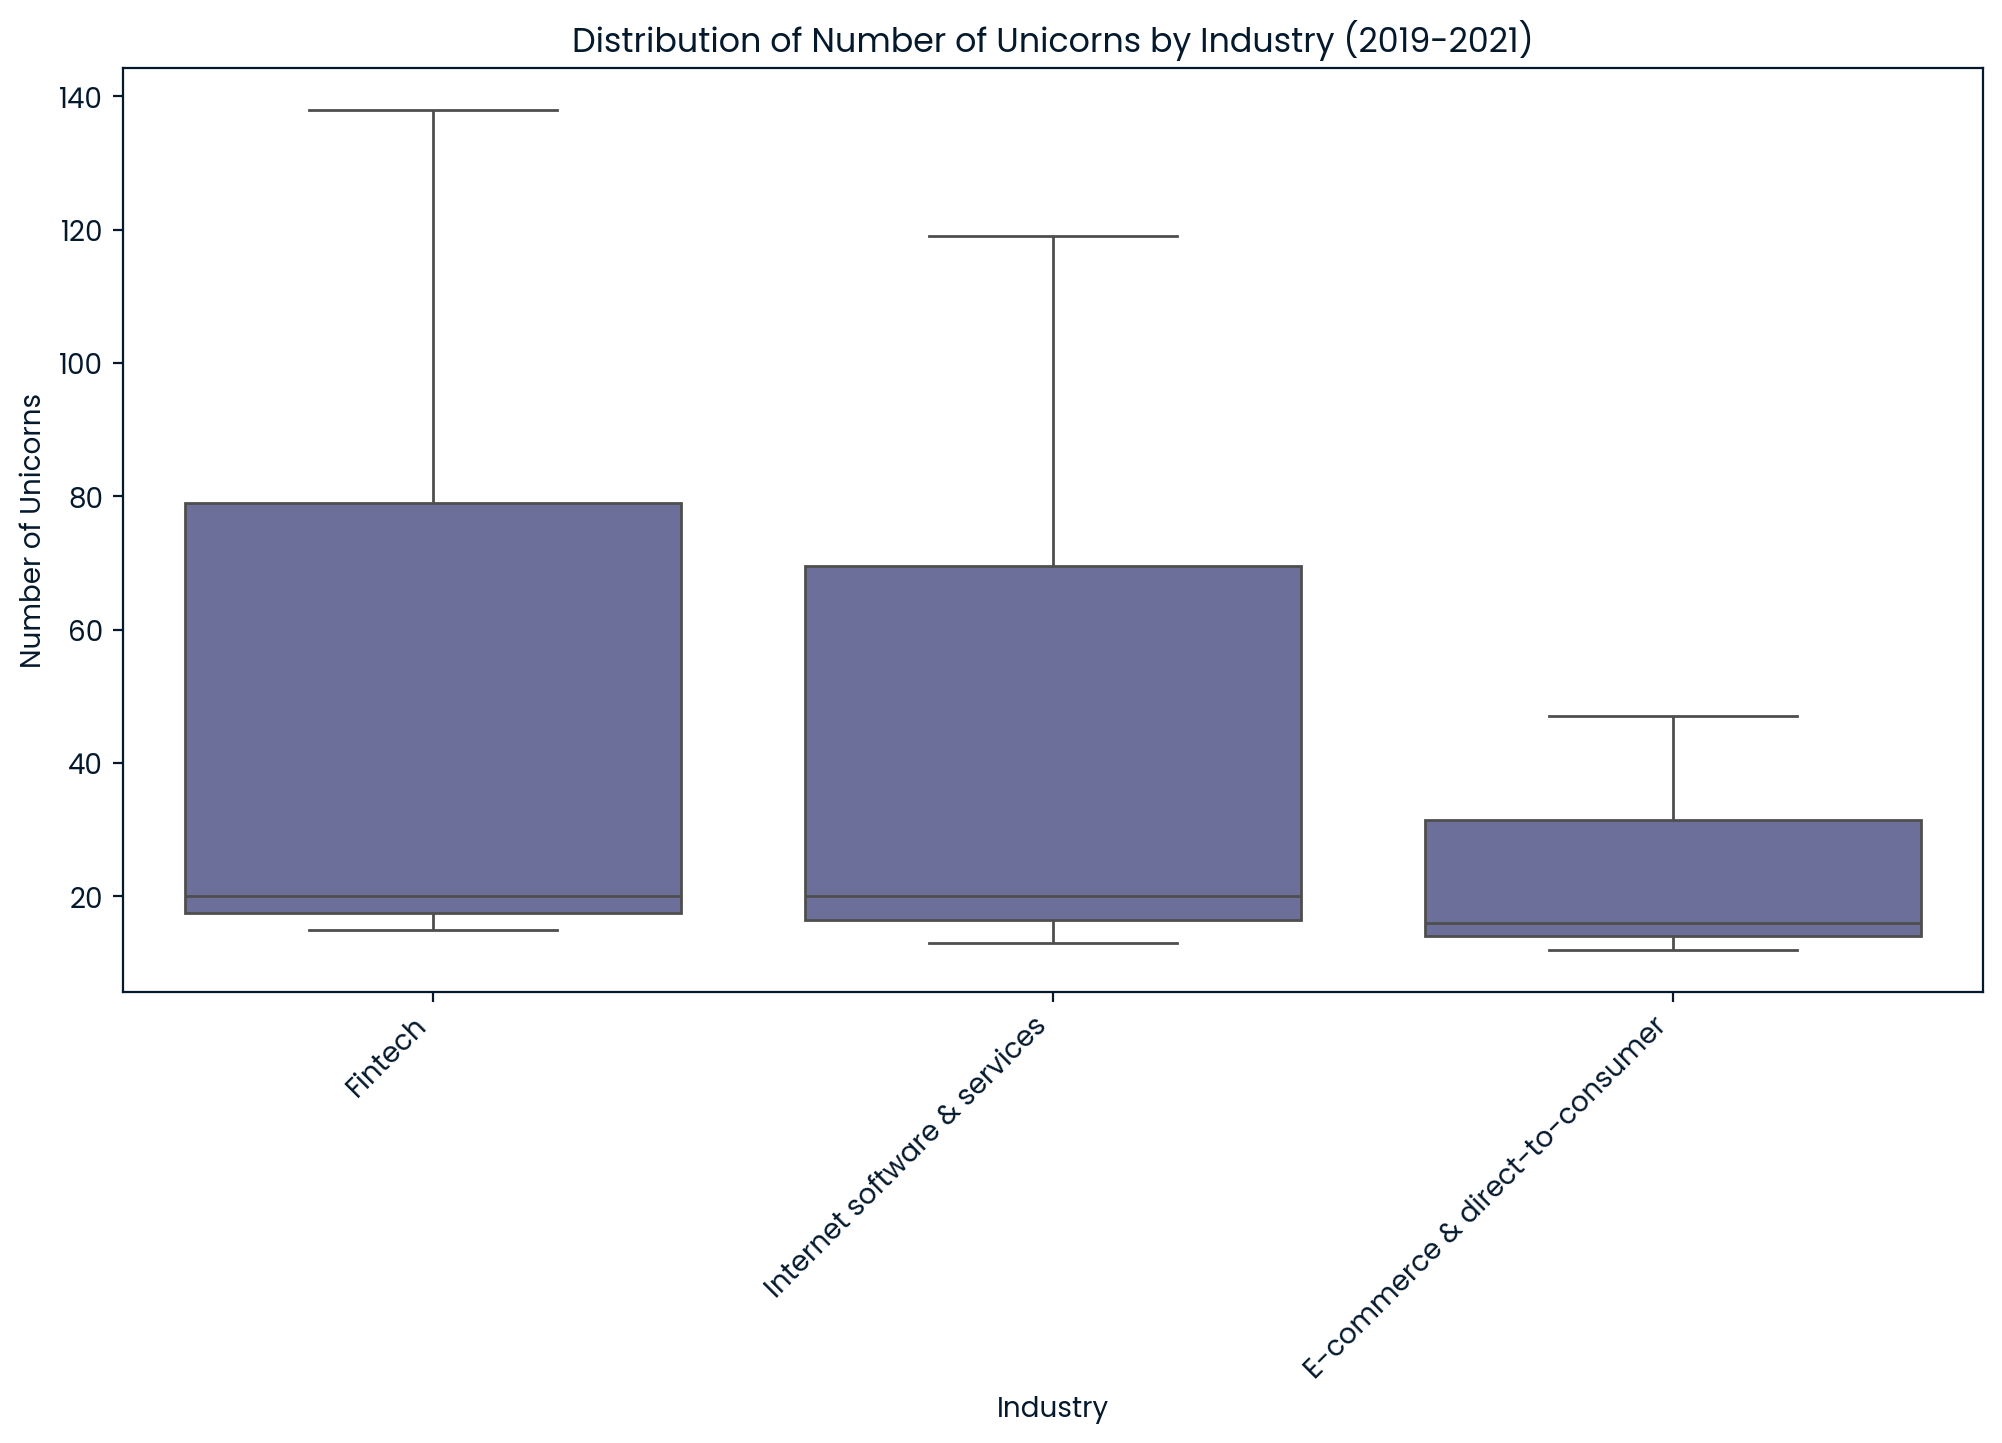

In [18]:
# Plotting the boxplot for number of unicorns by industry
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='industry', y='num_unicorns')

# Customize the chart
plt.title('Distribution of Number of Unicorns by Industry (2019-2021)')
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Save the chart
plt.savefig('boxplot_num_unicorns_by_industry.png')  # Save the figure as PNG
plt.show()
